In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [2]:
train_file = "D:/project/python/mooc/tensorflow2.0_course/chapter_5/data/titanic/train.csv"
eval_file = "D:/project/python/mooc/tensorflow2.0_course/chapter_5/data/titanic/eval.csv"

train_df = pd.read_csv(train_file)
eval_df = pd.read_csv(eval_file)

print(train_df.head())
print(eval_df.head())

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
   survived     sex   age  n_siblings_spouses  parch     fare   class  \
0         0    male  35.0                   0      0   8.0500   Third   
1         0    male  54.0                   0      0  51.8625   First   
2         1  female  58.0                   0      0  26.5500   First   
3         1  female  55.0                   0      0  16.0000  Second   
4         

In [3]:
y_train = train_df.pop("survived")
y_eval = eval_df.pop("survived")

print(train_df.head())
print(eval_df.head())
print(y_train.head())
print(y_eval.head())

      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
      sex   age  n_siblings_spouses  parch     fare   class     deck  \
0    male  35.0                   0      0   8.0500   Third  unknown   
1    male  54.0                   0      0  51.8625   First        E   
2  female  58.0                   0      0  26.5500   First        C   
3  female  55.0                   0      0  16.0000  Second  unknown   
4    male  34.0                   0      0  13.0000  Second        D   

  

In [4]:
train_df.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [5]:
print(train_df.shape, eval_df.shape)

(627, 9) (264, 9)


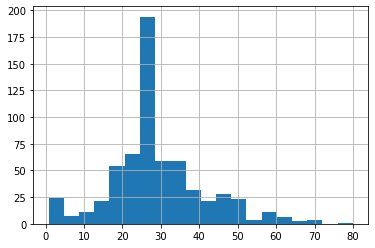

In [6]:
train_df.age.hist(bins=20)

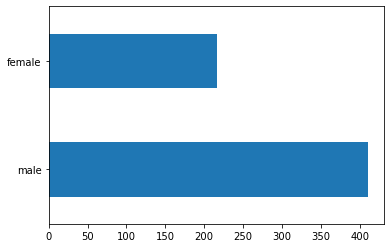

In [7]:
train_df.sex.value_counts().plot(kind='barh')

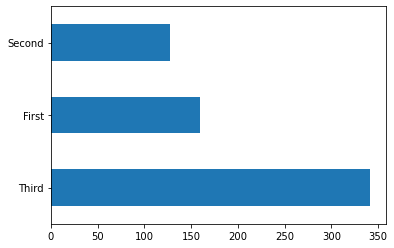

In [8]:
train_df['class'].value_counts().plot(kind='barh')

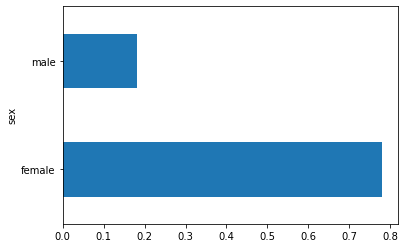

In [9]:
pd.concat([train_df, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh')

In [10]:
categorical_colums = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone'] 
numeric_colums = ['age', 'fare']

feature_colums = []
for categorical_colum in categorical_colums:
    vocat = train_df[categorical_colum].unique()
    print(categorical_colum, vocat)
    feature_colums.append(
        tf.feature_column.indicator_column(
            tf.feature_column.categorical_column_with_vocabulary_list(
                categorical_colum, vocat)))
    
for numeric_colum in numeric_colums:
    feature_colums.append(
        tf.feature_column.numeric_column(
            numeric_colum, dtype=tf.float32))

sex ['male' 'female']
n_siblings_spouses [1 0 3 4 2 5 8]
parch [0 1 2 5 3 4]
class ['Third' 'First' 'Second']
deck ['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
embark_town ['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
alone ['n' 'y']


In [15]:
def make_dataset(data_df, label_df, epochs=10, shuffle=True, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices(dict(data_df), label_df)
    if shuffle:
        dataset = dataset.shuffle(10000)
    dataset = dataset.repeat(epochs).batch(batch_size)
    return dataset

In [16]:
train_dataset = make_dataset(train_df, y_train, batch_size=5)

TypeError: from_tensor_slices() takes 1 positional argument but 2 were given

In [ ]:
for x, y in train_dataset.take(1):
    print(x, y)

In [ ]:
# keras.layers.DenseFeature

for x, y in train_dataset.take(1):
    age_colum = feature_colums[7]
    gender_colum = feature_colums[0]
    print(keras.layers.DenseFeatures(age_colum)(x).numpy())
    print(keras.layers.DenseFeatures(gender_colum)(x).numpy())